In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import sys

dir2 = os.path.abspath("")
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)

os.chdir("..")

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
column_names = [
    "model",
    "global_accuracy",
    "global_rocauc",
    "global_prauc",
    "local_type_accuracy",
    "local_type_rocauc",
    "local_type_prauc",
    "local_binary_accuracy",
    "local_binary_rocauc",
    "local_binary_prauc",
]

In [5]:
df = pd.read_csv("results/results.csv", header=None)

df.columns = column_names

df_churn = df.iloc[:9]
df_default = df.iloc[10:19]
df_hsbc = df.iloc[20:29]
df_age = df.iloc[30:19]

df_churn

,model,global_accuracy,global_rocauc,global_prauc,local_type_accuracy,local_type_rocauc,local_type_prauc,local_binary_accuracy,local_binary_rocauc,local_binary_prauc
0,Best sup.,0.667 $\pm$ 0.015,0.71 $\pm$ 0.017,0.748 $\pm$ 0.018,0.249 $\pm$ 0.007,0.642 $\pm$ 0.005,0.173 $\pm$ 0.001,0.729 $\pm$ 0.006,0.55 $\pm$ 0.008,0.305 $\pm$ 0.008
1,CoLES,0.686 $\pm$ 0.016,0.733 $\pm$ 0.015,0.772 $\pm$ 0.026,0.232 $\pm$ 0.002,0.643 $\pm$ 0.007,0.162 $\pm$ 0.005,0.732 $\pm$ 0.000,0.556 $\pm$ 0.009,0.316 $\pm$ 0.014
2,TS2Vec,0.645 $\pm$ 0.015,0.689 $\pm$ 0.009,0.750 $\pm$ 0.024,0.158 $\pm$ 0.011,0.632 $\pm$ 0.013,0.137 $\pm$ 0.009,0.652 $\pm$ 0.045,0.518 $\pm$ 0.032,0.284 $\pm$ 0.015
3,AE,0.687 $\pm$ 0.007,0.756 $\pm$ 0.007,0.815 $\pm$ 0.011,0.265 $\pm$ 0.014,0.697 $\pm$ 0.003,0.211 $\pm$ 0.003,0.733 $\pm$ 0.000,0.573 $\pm$ 0.003,0.328 $\pm$ 0.015
4,MLM,0.686 $\pm$ 0.009,0.753 $\pm$ 0.014,0.811 $\pm$ 0.018,0.277 $\pm$ 0.003,0.723 $\pm$ 0.003,0.211 $\pm$ 0.002,0.733 $\pm$ 0.002,0.570 $\pm$ 0.008,0.331 $\pm$ 0.009
5,AR,0.702 $\pm$ 0.004,0.754 $\pm$ 0.006,0.796 $\pm$ 0.009,0.277 $\pm$ 0.002,0.725 $\pm$ 0.004,0.232 $\pm$ 0.003,0.732 $\pm$ 0.000,0.583 $\pm$ 0.009,0.339 $\pm$ 0.007
6,NHP,0.683 $\pm$ 0.022,0.748 $\pm$ 0.018,0.772 $\pm$ 0.007,0.243 $\pm$ 0.000,0.538 $\pm$ 0.019,0.134 $\pm$ 0.013,0.634 $\pm$ 0.000,0.535 $\pm$ 0.043,0.404 $\pm$ 0.043
7,A-NHP,0.674 $\pm$ 0.015,0.719 $\pm$ 0.013,0.749 $\pm$ 0.006,0.209 $\pm$ 0.005,0.556 $\pm$ 0.009,0.130 $\pm$ 0.005,0.635 $\pm$ 0.002,0.545 $\pm$ 0.028,0.413 $\pm$ 0.018
8,COTIC,0.669 $\pm$ 0.029,0.731 $\pm$ 0.028,0.751 $\pm$ 0.024,0.218 $\pm$ 0.033,0.512 $\pm$ 0.007,0.116 $\pm$ 0.002,0.632 $\pm$ 0.002,0.488 $\pm$ 0.011,0.358 $\pm$ 0.007


In [6]:
local_column = "local_type_rocauc"
global_column = "global_rocauc"

model_names = df_churn["model"].to_list()
model_names

['Best sup.', 'CoLES', 'TS2Vec', 'AE', 'MLM', 'AR', 'NHP', 'A-NHP', 'COTIC']

In [7]:
local_metrics_list = df_churn[local_column].to_list()
global_metrics_list = df_churn[global_column].to_list()

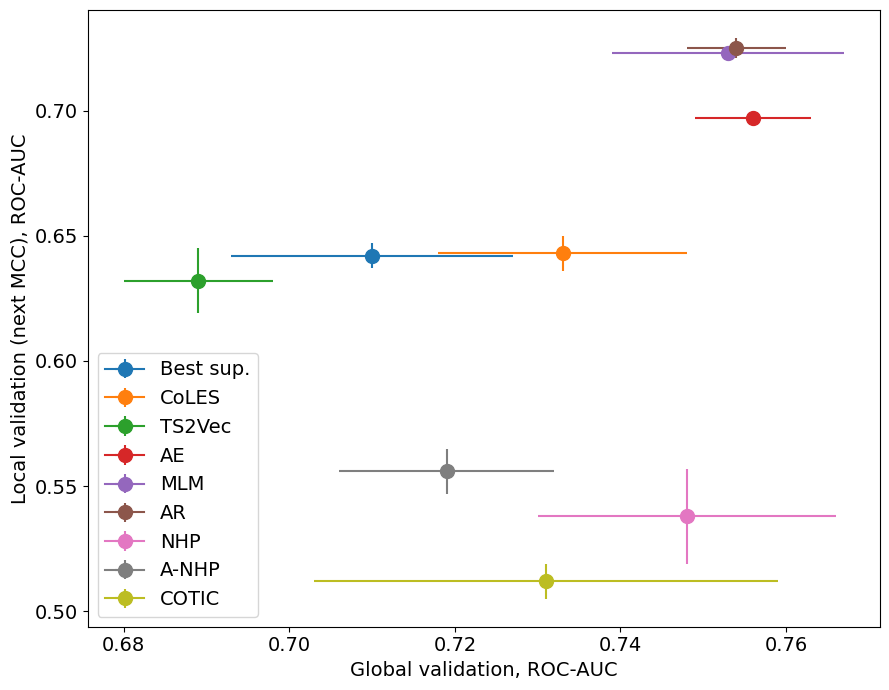

In [24]:
fontsize = 14

plt.figure(figsize=(9, 7))
for model_name, global_metric, local_metric in zip(
    model_names, global_metrics_list, local_metrics_list
):
    global_metric_mean = float(global_metric.split(" ")[0])
    global_metric_std = float(global_metric.split(" ")[-1])

    local_metric_mean = float(local_metric.split(" ")[0])
    local_metric_std = float(local_metric.split(" ")[-1])

    plt.errorbar(
        global_metric_mean,
        local_metric_mean,
        xerr=global_metric_std,
        yerr=local_metric_std,
        marker="o",
        markersize=10,
        label=model_name,
    )

# plt.title("Churn: global and local quality of the models", fontsize=fontsize)
plt.xlabel("Global validation, ROC-AUC", fontsize=fontsize)
plt.ylabel("Local validation (next MCC), ROC-AUC", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc="best")
plt.tight_layout()
# plt.savefig("results/figures/churn_global_event_type_rocauc.pdf", dpi=300)
plt.show()

# Churn

## Main results

In [3]:
# read table, fix column namings, etc.
res_churn_df = pd.read_csv("results/all_res_churn.csv", sep=",")

res_churn_df.drop(["Unnamed: 16", "Unnamed: 17"], axis=1, inplace=True)

columns = [
    "Model",
    "Modifications / versions",
    "global_Accuracy",
    "global_F1-score",
    "global_ROC-AUC",
    "global_Pr-AUC",
    "binary_Accuracy",
    "binary_F1-score",
    "binary_ROC-AUC",
    "binary_Pr-AUC",
    "event_type_Accuracy",
    "event_type_F1-score",
    "event_type_ROC-AUC",
    "event_type_Pr-AUC",
    "return_time_MSE",
    "return_time_R2",
]

res_churn_df.columns = columns

res_churn_df.drop([0], inplace=True)
res_churn_df["Model"] = (
    res_churn_df["Model"] + "_" + res_churn_df["Modifications / versions"]
)

res_churn_df.drop(["Modifications / versions"], axis=1, inplace=True)

res_churn_df

FileNotFoundError: [Errno 2] No such file or directory: 'results/all_res_churn.csv'

In [4]:
# select metrics to be drawn
global_metric_name = "global_ROC-AUC"
local_binary_metric_name = "binary_ROC-AUC"
local_event_type_metric_name = "event_type_ROC-AUC"

metrics = [global_metric_name, local_binary_metric_name, local_event_type_metric_name]

# select metric to decide which model is the best
deciding_metric = local_event_type_metric_name

In [6]:
# initialize dict with results, draw results for pooling separately
model_names = [
    "CoLES_none",
    "CoLES_timestamp, time delta",
    "CoLES_TimeCLR sampling",
    "CoLES_on CoLES, seq2seq",
    # "CoLES_global pooling_best",
    "AE_best",
    "MLM_none",
    "TS2Vec_none",
    "COTIC_best",
    "GPT_best",
]

result_dicts = {}

for name in model_names:
    result_dicts[name] = {}

In [7]:
# read metrics
for name, d in result_dicts.items():
    if not name.endswith("best"):
        for m in metrics:
            d[m] = res_churn_df[res_churn_df["Model"] == name][m].item()
    else:
        model_name_prefix = name[:-5]
        best_model_idx = (
            res_churn_df[res_churn_df["Model"].str.startswith(model_name_prefix)][
                deciding_metric
            ]
            .str.split(" ")
            .apply(lambda x: x[0])
            .astype(float)
            .idxmax()
        )

        for m in metrics:
            d[m] = res_churn_df.iloc[best_model_idx - 1][m]

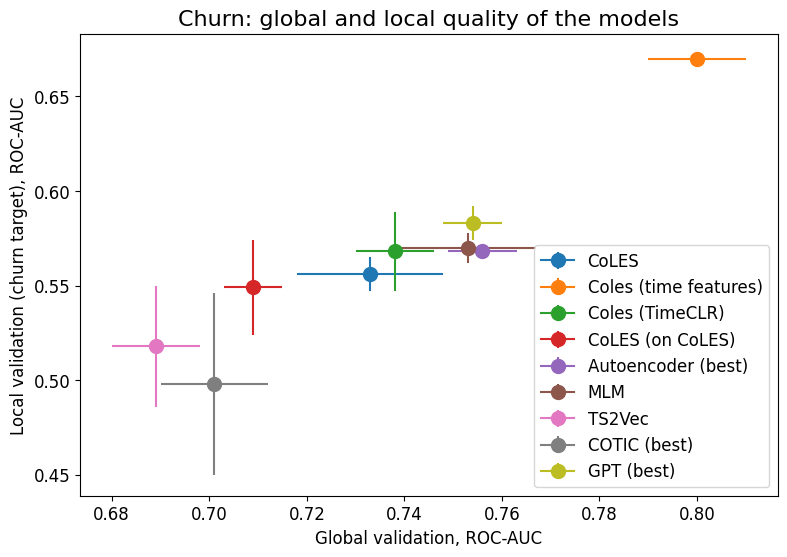

In [9]:
# churn target vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_binary_metric_mean = float(d[local_binary_metric_name].split(" ")[0])
    local_binary_metric_std = float(d[local_binary_metric_name].split(" ")[-1])

    if name.endswith("none"):
        label = name.split("_")[0]

    elif name == "CoLES_timestamp, time delta":
        label = "Coles (time features)"

    elif name == "CoLES_TimeCLR sampling":
        label = "Coles (TimeCLR)"

    # elif name == "CoLES_global pooling_best":
    #    label = "CoLES (best pooling)"

    elif name == "CoLES_on CoLES, seq2seq":
        label = "CoLES (on CoLES)"

    elif name == "AE_best":
        label = "Autoencoder (best)"

    elif name == "COTIC_best":
        label = "COTIC (best)"

    elif name == "GPT_best":
        label = "GPT (best)"

    else:
        raise ValueError("Unknown model name")

    plt.errorbar(
        global_metric_mean,
        local_binary_metric_mean,
        xerr=global_metric_std,
        yerr=local_binary_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Churn: global and local quality of the models", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (churn target)" + ", " + local_binary_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower right")
# plt.savefig("results/Churn_global_binary_best_event_type_rocauc.pdf", dpi=300)
plt.show()

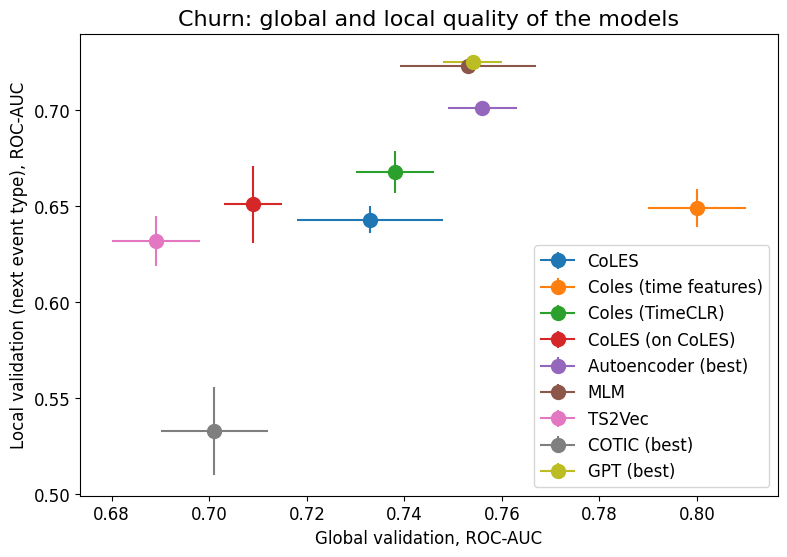

In [11]:
# event type vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_event_type_metric_mean = float(d[local_event_type_metric_name].split(" ")[0])
    local_event_type_metric_std = float(d[local_event_type_metric_name].split(" ")[-1])

    if name.endswith("none"):
        label = name.split("_")[0]

    elif name == "CoLES_timestamp, time delta":
        label = "Coles (time features)"

    elif name == "CoLES_TimeCLR sampling":
        label = "Coles (TimeCLR)"

    # elif name == "CoLES_global pooling_best":
    #    label = "CoLES (best pooling)"

    elif name == "CoLES_on CoLES, seq2seq":
        label = "CoLES (on CoLES)"

    elif name == "AE_best":
        label = "Autoencoder (best)"

    elif name == "COTIC_best":
        label = "COTIC (best)"

    elif name == "GPT_best":
        label = "GPT (best)"

    else:
        raise ValueError("Unknown model name")

    plt.errorbar(
        global_metric_mean,
        local_event_type_metric_mean,
        xerr=global_metric_std,
        yerr=local_event_type_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Churn: global and local quality of the models", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (next event type)"
    + ", "
    + local_event_type_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower right")
# plt.savefig("results/Churn_global_event_type_best_event_type_rocauc.pdf", dpi=300)
plt.show()

## Poolings

In [12]:
pooling_names = ["none", "(mean)", "(max)", "(attention)", "(learnable attention)"]

result_dicts_pooling = {}

for name in pooling_names:
    result_dicts_pooling[name] = {}

for name, d in result_dicts_pooling.items():
    if not name.endswith("none"):
        model_name = "CoLES_global pooling " + name
    else:
        model_name = "CoLES_none"

    for m in metrics:
        d[m] = res_churn_df[res_churn_df["Model"] == model_name][m].item()

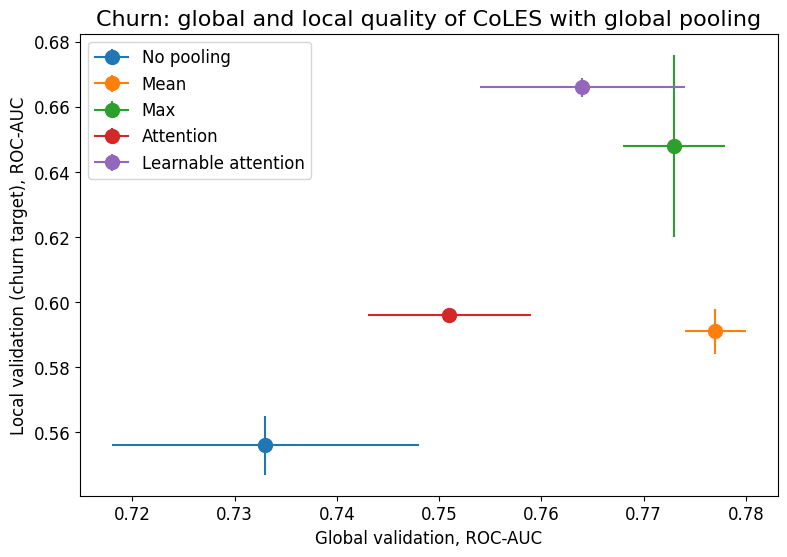

In [13]:
# churn target vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts_pooling.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_binary_metric_mean = float(d[local_binary_metric_name].split(" ")[0])
    local_binary_metric_std = float(d[local_binary_metric_name].split(" ")[-1])

    if not name.endswith("none"):
        label = name[1:-1].capitalize()
    else:
        label = "No pooling"

    plt.errorbar(
        global_metric_mean,
        local_binary_metric_mean,
        xerr=global_metric_std,
        yerr=local_binary_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Churn: global and local quality of CoLES with global pooling", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (churn target)" + ", " + local_binary_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
# plt.savefig("results/Churn_global_binary_global_pooling.pdf", dpi=300)
plt.show()

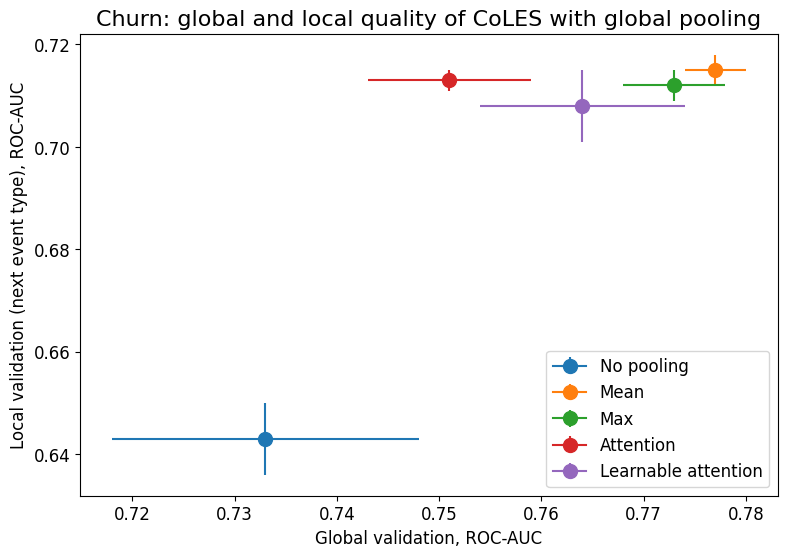

In [14]:
# event type vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts_pooling.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_event_type_metric_mean = float(d[local_event_type_metric_name].split(" ")[0])
    local_event_type_metric_std = float(d[local_event_type_metric_name].split(" ")[-1])

    if not name.endswith("none"):
        label = name[1:-1].capitalize()
    else:
        label = "No pooling"

    plt.errorbar(
        global_metric_mean,
        local_event_type_metric_mean,
        xerr=global_metric_std,
        yerr=local_event_type_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Churn: global and local quality of CoLES with global pooling", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (next event type)"
    + ", "
    + local_event_type_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower right")
# plt.savefig("results/Churn_global_event_type_global_pooling.pdf", dpi=300)
plt.show()

# Default

## Main results

In [36]:
res_default_df = pd.read_csv("results/all_res_default.csv", sep=",")

columns = [
    "Model",
    "Modifications / versions",
    "global_Accuracy",
    "global_F1-score",
    "global_ROC-AUC",
    "global_Pr-AUC",
    "binary_Accuracy",
    "binary_F1-score",
    "binary_ROC-AUC",
    "binary_Pr-AUC",
    "event_type_Accuracy",
    "event_type_F1-score",
    "event_type_ROC-AUC",
    "event_type_Pr-AUC",
    "return_time_MSE",
    "return_time_R2",
]

res_default_df.columns = columns

res_default_df.drop([0], inplace=True)
res_default_df["Model"] = (
    res_default_df["Model"] + "_" + res_default_df["Modifications / versions"]
)

res_default_df.drop(["Modifications / versions"], axis=1, inplace=True)

In [37]:
global_metric_name = "global_ROC-AUC"
local_binary_metric_name = "binary_ROC-AUC"
local_event_type_metric_name = "event_type_ROC-AUC"

metrics = [global_metric_name, local_binary_metric_name, local_event_type_metric_name]

deciding_metric = global_metric_name

In [38]:
model_names = [
    "CoLES_none",
    "CoLES_timestamp, time delta",
    # "CoLES_TimeCLR sampling",
    # "CoLES_on CoLES, seq2seq",
    # "CoLES_global pooling_best",
    "AE_best",
    "MLM_none",
    "TS2Vec_none",
    "COTIC_best",
    "GPT_v1",
]

result_dicts = {}

for name in model_names:
    result_dicts[name] = {}

In [39]:
for name, d in result_dicts.items():
    if not name.endswith("best"):
        for m in metrics:
            d[m] = res_default_df[res_default_df["Model"] == name][m].item()
    else:
        model_name_prefix = name[:-5]
        best_model_idx = (
            res_default_df[res_default_df["Model"].str.startswith(model_name_prefix)][
                deciding_metric
            ]
            .str.split(" ")
            .apply(lambda x: x[0])
            .astype(float)
            .idxmax()
        )

        for m in metrics:
            d[m] = res_default_df.iloc[best_model_idx - 1][m]

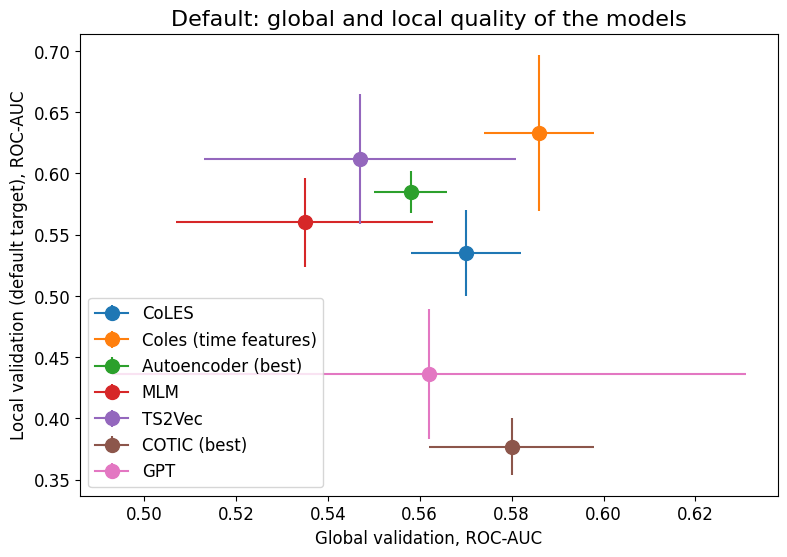

In [40]:
# default target vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_binary_metric_mean = float(d[local_binary_metric_name].split(" ")[0])
    local_binary_metric_std = float(d[local_binary_metric_name].split(" ")[-1])

    if name.endswith("none"):
        label = name.split("_")[0]

    elif name == "CoLES_timestamp, time delta":
        label = "Coles (time features)"

    # elif name == "CoLES_TimeCLR sampling":
    #    label = "Coles (TimeCLR)"

    # elif name == "CoLES_global pooling_best":
    #    label = "CoLES (best pooling)"

    # elif name == "CoLES_on CoLES, seq2seq":
    #    label = "CoLES (on CoLES)"

    elif name == "AE_best":
        label = "Autoencoder (best)"

    elif name == "COTIC_best":
        label = "COTIC (best)"

    elif name == "GPT_v1":
        label = "GPT"

    else:
        raise ValueError("Unknown model name")

    plt.errorbar(
        global_metric_mean,
        local_binary_metric_mean,
        xerr=global_metric_std,
        yerr=local_binary_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Default: global and local quality of the models", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (default target)"
    + ", "
    + local_binary_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower left")
# plt.savefig("results/Default_global_binary_best_event_type_rocauc.jpg", dpi=300)
plt.show()

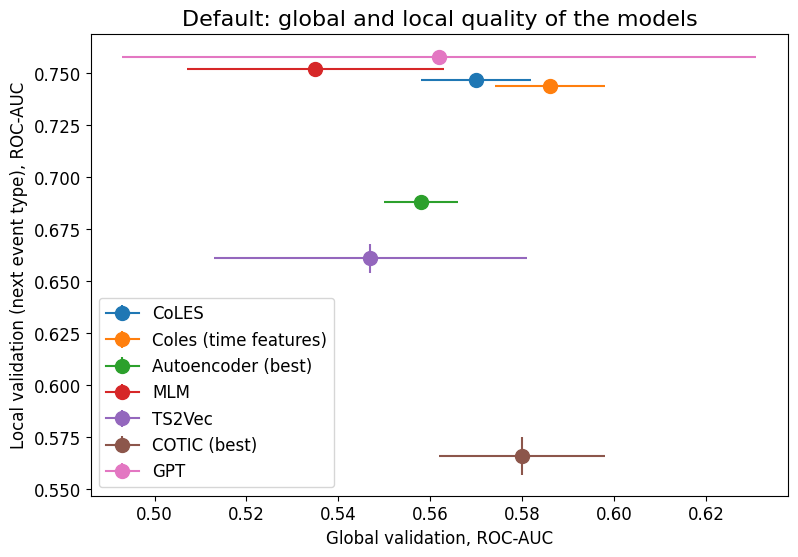

In [41]:
# event type vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_event_type_metric_mean = float(d[local_event_type_metric_name].split(" ")[0])
    local_event_type_metric_std = float(d[local_event_type_metric_name].split(" ")[-1])

    if name.endswith("none"):
        label = name.split("_")[0]

    elif name == "CoLES_timestamp, time delta":
        label = "Coles (time features)"

    # elif name == "CoLES_TimeCLR sampling":
    #    label = "Coles (TimeCLR)"

    # elif name == "CoLES_global pooling_best":
    #    label = "CoLES (best pooling)"

    # elif name == "CoLES_on CoLES, seq2seq":
    #    label = "CoLES (on CoLES)"

    elif name == "AE_best":
        label = "Autoencoder (best)"

    elif name == "COTIC_best":
        label = "COTIC (best)"

    elif name == "GPT_v1":
        label = "GPT"

    else:
        raise ValueError("Unknown model name")

    plt.errorbar(
        global_metric_mean,
        local_event_type_metric_mean,
        xerr=global_metric_std,
        yerr=local_event_type_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Default: global and local quality of the models", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (next event type)"
    + ", "
    + local_event_type_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower left")
# plt.savefig("results/Default_global_event_type_best_event_type_rocauc.jpg", dpi=300)
plt.show()

## Poolings

In [42]:
pooling_names = ["none", "(mean)", "(max)", "(attention)", "(learnable attention)"]

result_dicts_pooling = {}

for name in pooling_names:
    result_dicts_pooling[name] = {}

for name, d in result_dicts_pooling.items():
    if not name.endswith("none"):
        model_name = "CoLES_global pooling " + name
    else:
        model_name = "CoLES_none"

    for m in metrics:
        d[m] = res_default_df[res_churn_df["Model"] == model_name][m].item()

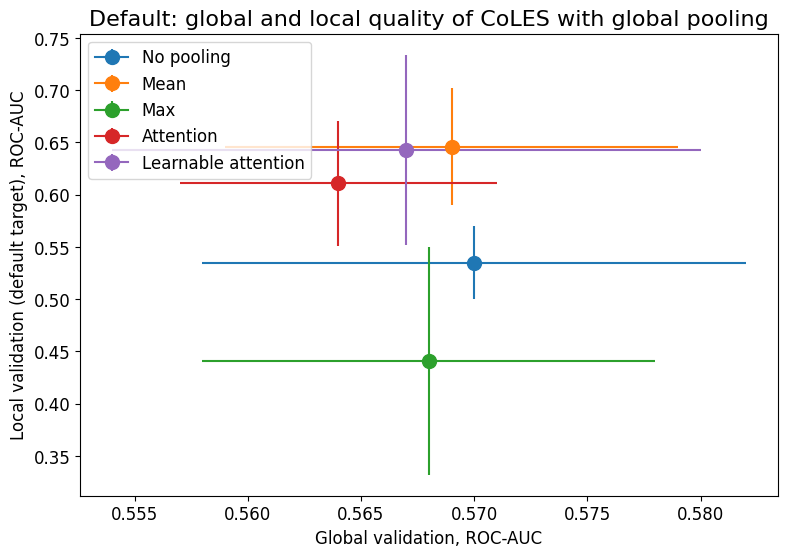

In [43]:
# default target vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts_pooling.items():
    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_binary_metric_mean = float(d[local_binary_metric_name].split(" ")[0])
    local_binary_metric_std = float(d[local_binary_metric_name].split(" ")[-1])

    if not name.endswith("none"):
        label = name[1:-1].capitalize()
    else:
        label = "No pooling"

    plt.errorbar(
        global_metric_mean,
        local_binary_metric_mean,
        xerr=global_metric_std,
        yerr=local_binary_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Default: global and local quality of CoLES with global pooling", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (default target)"
    + ", "
    + local_binary_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
# plt.savefig("results/Default_global_binary_global_pooling.pdf", dpi=300)
plt.show()

name: none
global_metric_mean: 0.57
name: (mean)
global_metric_mean: 0.569
name: (max)
global_metric_mean: 0.568
name: (attention)
global_metric_mean: 0.564
name: (learnable attention)
global_metric_mean: 0.567


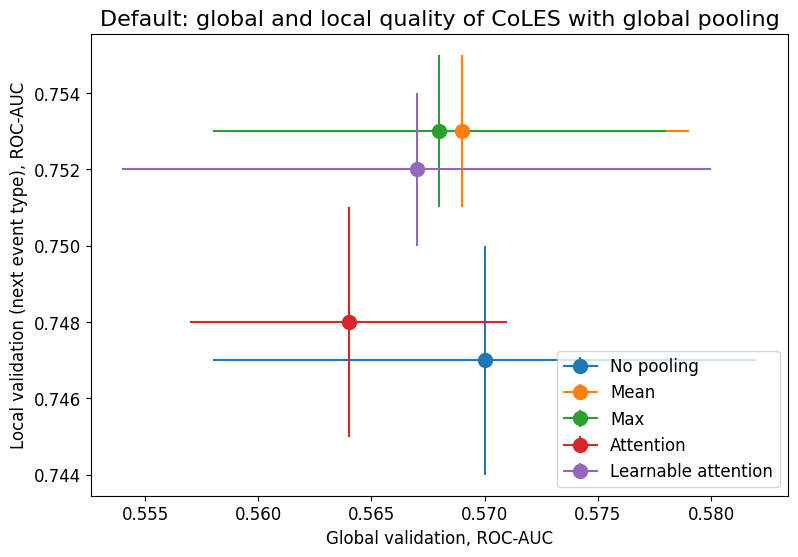

In [44]:
# event type vs global validation
plt.figure(figsize=(9, 6))
for name, d in result_dicts_pooling.items():
    print("name:", name)

    global_metric_mean = float(d[global_metric_name].split(" ")[0])
    global_metric_std = float(d[global_metric_name].split(" ")[-1])

    local_event_type_metric_mean = float(d[local_event_type_metric_name].split(" ")[0])
    local_event_type_metric_std = float(d[local_event_type_metric_name].split(" ")[-1])

    print("global_metric_mean:", global_metric_mean)

    if not name.endswith("none"):
        label = name[1:-1].capitalize()
    else:
        label = "No pooling"

    plt.errorbar(
        global_metric_mean,
        local_event_type_metric_mean,
        xerr=global_metric_std,
        yerr=local_event_type_metric_std,
        marker="o",
        markersize=10,
        label=label,
    )

plt.title("Default: global and local quality of CoLES with global pooling", fontsize=16)
plt.xlabel("Global validation" + ", " + global_metric_name.split("_")[-1], fontsize=12)
plt.ylabel(
    "Local validation (next event type)"
    + ", "
    + local_event_type_metric_name.split("_")[-1],
    fontsize=12,
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="lower right")
# plt.savefig("results/Default_global_event_type_global_pooling.pdf", dpi=300)
plt.show()